In [20]:
import pandas as pd
df = pd.read_csv('spam.csv',sep=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [22]:
# Keep necessary columns only
df = df[['v1','v2']]

# Renaming columns

## df.columns = ['label','sms']
df = df.set_axis(['label','sms'], axis=1)

# Shape of dataframe
print(df.shape)

# Null values
print('Null Values in the dataframe:',df.isnull().sum().sum())
print('\n Null Values by columns:')
print(df.isna().sum())

(5572, 2)
Null Values in the dataframe: 0

 Null Values by columns:
label    0
sms      0
dtype: int64


In [24]:
## Target column Distribution
label_count = df.label.value_counts()
print('Target Column Distribution:')
print(label_count)

label_percent = df.label.value_counts(normalize=True)*100
print('\nTarget Column Distribution[--percent--]:')
print(label_percent)

# Balance check              we will keep threshold upto 60%
if label_percent.get('ham',0)>60:
    print("\nImbalance Classes in Dataframe")
else:
    print("Balanced Dataframe")


Target Column Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Target Column Distribution[--percent--]:
label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

Imbalance Classes in Dataframe


In [26]:
import string
import contractions
import re
import nltk
nltk.download('stopwords')  # if not
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
## Text Preprocessing Function

def clean_text(text):
    """ This function will do complete preproceesing of the text and provide clean_text
        lowercasing, special character, numbers, contraction, stopwords etc."""
    # Lowercasing
    text = text.lower()

    # HTML Tags (if any)
    text = re.sub(r"<.*?>","", text)
    
    # Url's and digits
    text = re.sub(r"https?://\S+|www\.\S+|[\d]+","", text)

    # contractions word like im --> i am
    text = contractions.fix(text)

    # Punctuations
    text = text.translate(str.maketrans("","",string.punctuation))

    # Split text
    words = text.split()
    
    # Stopwords
    eng_words = stopwords.words('english')
    words = [ps.stem(word) for word in words if word not in eng_words]
    return " ".join(words)
    

In [30]:
df1 = df.copy()

In [32]:
df1['sms_legth'] = df1.sms.apply(len)

In [34]:
df1['cleaned_sms'] = df1.sms.apply(clean_text)

In [36]:
df1

,label,sms,sms_legth,cleaned_sms
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,dun say earli hor c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,nd time tri contact å£ pound prize claim easi ...
5568,ham,Will Ì_ b going to esplanade fr home?,37,ì b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti mood soani suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitch act like would interest buy someth e...


In [38]:
# Encoding target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['label'] = le.fit_transform(df1['label'])
df1.head()

,label,sms,sms_legth,cleaned_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,dun say earli hor c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


## 1. Bag of Words Model

In [40]:
# train test split
X = df1['cleaned_sms']
y = df1['label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [42]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

4457 4457
1115 1115


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=2500, ngram_range=(1,2))

X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [46]:
bow.vocabulary_

{'still': 2004,
 'mom': 1374,
 'check': 329,
 'yo': 2484,
 'half': 930,
 'bank': 134,
 'issu': 1093,
 'pick': 1581,
 'member': 1316,
 'per': 1563,
 'give': 843,
 'second': 1819,
 'chanc': 316,
 'play': 1599,
 'ltgt': 1256,
 'privat': 1657,
 'account': 7,
 'statement': 1997,
 'show': 1880,
 'unredeem': 2264,
 'point': 1626,
 'call': 236,
 'identifi': 1054,
 'code': 360,
 'expir': 673,
 'privat account': 1658,
 'account statement': 8,
 'statement show': 1998,
 'show unredeem': 1882,
 'unredeem point': 2265,
 'point call': 1627,
 'call identifi': 250,
 'identifi code': 1055,
 'code expir': 361,
 'say': 1804,
 'never': 1437,
 'answer': 62,
 'text': 2108,
 'lost': 1235,
 'pound': 1638,
 'help': 978,
 'bit': 169,
 'sort': 1952,
 'stuff': 2040,
 'come': 378,
 'peopl': 1561,
 'wah': 2328,
 'lucki': 1265,
 'man': 1281,
 'save': 1802,
 'money': 1378,
 'hee': 969,
 'much': 1406,
 'better': 158,
 'thank': 2124,
 'lol': 1222,
 'receiv': 1712,
 'refer': 1719,
 'home': 1020,
 'dinner': 562,
 'come ho

### Naive Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB
spam_model = MultinomialNB()
spam_model.fit(X_train_bow,y_train)

MultinomialNB()

In [50]:
y_pred = spam_model.predict(X_test_bow)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9766816143497757
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.95      0.87      0.91       150

    accuracy                           0.98      1115
   macro avg       0.96      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Text(0.5, 14.722222222222216, 'Predicted Label')

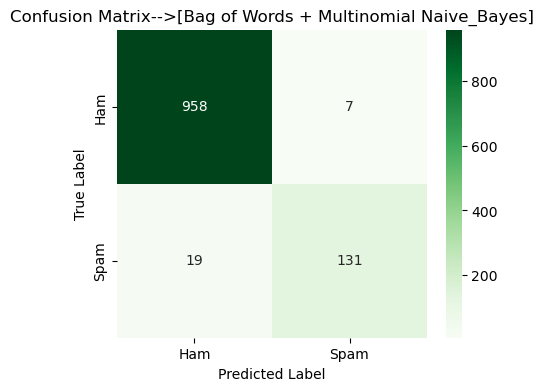

In [54]:
# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens",xticklabels=["Ham", "Spam"],yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix-->[Bag of Words + Multinomial Naive_Bayes]")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [58]:
## Prediction on new text.  1 for spam, 0 for not spam

test_review = bow.transform(["Save even more - get an EXTRA 30% OFF active bundles & 15% OFF your final price when you pay with cryptocurrency on any store purchase! View in browser.Exclusive for you"])
p = spam_model.predict_proba(test_review)
s = spam_model.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[0.27683277 0.72316723]]
prediction are: [1]


In [62]:
test_review = bow.transform(["AI SOFTWARES is hiring  DATA ANALYST INTERN  for their upcoming project. The job description (JD) is available in the application form linked below. Kindly go through the details carefully."])
p = spam_model.predict_proba(test_review)
s = spam_model.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[9.99701912e-01 2.98088115e-04]]
prediction are: [0]


### XG Boost

In [64]:
from xgboost import XGBClassifier
spam_model = XGBClassifier()
spam_model.fit(X_train_bow,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [66]:
y_pred = spam_model.predict(X_test_bow)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9721973094170404
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.96      0.83      0.89       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



Text(0.5, 14.722222222222216, 'Predicted Label')

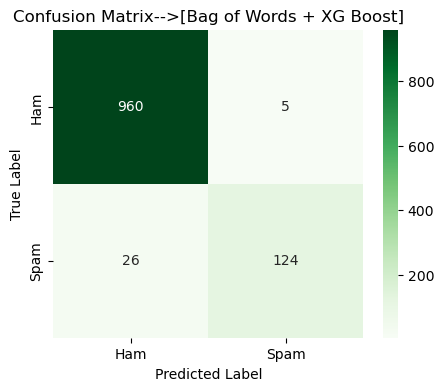

In [70]:
# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens",xticklabels=["Ham", "Spam"],yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix-->[Bag of Words + XG Boost]")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [72]:
## Prediction on new text.  1 for spam, 0 for not spam

test_review = bow.transform(["Save even more - get an EXTRA 30% OFF active bundles & 15% OFF your final price when you pay with cryptocurrency on any store purchase! View in browser.Exclusive for you"])
p = spam_model.predict_proba(test_review)
s = spam_model.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[0.98955333 0.01044668]]
prediction are: [0]


In [74]:
test_review = bow.transform(["AI SOFTWARES is hiring  DATA ANALYST INTERN  for their upcoming project. The job description (JD) is available in the application form linked below. Kindly go through the details carefully."])
p = spam_model.predict_proba(test_review)
s = spam_model.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[0.9905633  0.00943675]]
prediction are: [0]


## 2. TF-IDF model

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [78]:
tfidf.vocabulary_

{'still': 2004,
 'mom': 1374,
 'check': 329,
 'yo': 2484,
 'half': 930,
 'bank': 134,
 'issu': 1093,
 'pick': 1581,
 'member': 1316,
 'per': 1563,
 'give': 843,
 'second': 1819,
 'chanc': 316,
 'play': 1599,
 'ltgt': 1256,
 'privat': 1657,
 'account': 7,
 'statement': 1997,
 'show': 1880,
 'unredeem': 2264,
 'point': 1626,
 'call': 236,
 'identifi': 1054,
 'code': 360,
 'expir': 673,
 'privat account': 1658,
 'account statement': 8,
 'statement show': 1998,
 'show unredeem': 1882,
 'unredeem point': 2265,
 'point call': 1627,
 'call identifi': 250,
 'identifi code': 1055,
 'code expir': 361,
 'say': 1804,
 'never': 1437,
 'answer': 62,
 'text': 2108,
 'lost': 1235,
 'pound': 1638,
 'help': 978,
 'bit': 169,
 'sort': 1952,
 'stuff': 2040,
 'come': 378,
 'peopl': 1561,
 'wah': 2328,
 'lucki': 1265,
 'man': 1281,
 'save': 1802,
 'money': 1378,
 'hee': 969,
 'much': 1406,
 'better': 158,
 'thank': 2124,
 'lol': 1222,
 'receiv': 1712,
 'refer': 1719,
 'home': 1020,
 'dinner': 562,
 'come ho

### Naive Bayes

In [80]:
spam_model_tf = MultinomialNB()
spam_model_tf.fit(X_train_tfidf,y_train)

MultinomialNB()

In [82]:
y_pred = spam_model_tf.predict(X_test_tfidf)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [84]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9713004484304932
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



Text(0.5, 14.722222222222216, 'Predicted Label')

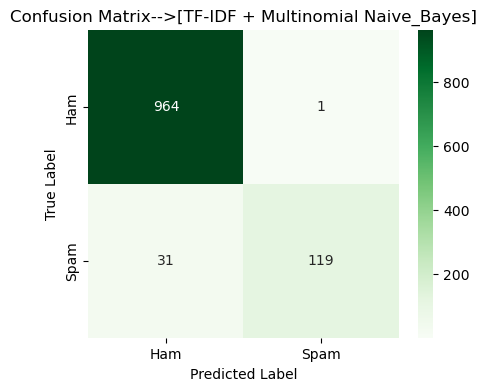

In [86]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens",xticklabels=["Ham", "Spam"],yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix-->[TF-IDF + Multinomial Naive_Bayes]")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [96]:
## Prediction on new text.  1 for spam, 0 for not spam

test_review = tfidf.transform(["Save even more - get an EXTRA 30% OFF active bundles & 15% OFF your final price when you pay with cryptocurrency on any store purchase! View in browser.Exclusive for you"])
p = spam_model_tf.predict_proba(test_review)
s = spam_model_tf.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[0.7499064 0.2500936]]
prediction are: [0]


In [98]:
test_review = tfidf.transform(["AI SOFTWARES is hiring  DATA ANALYST INTERN  for their upcoming project. The job description (JD) is available in the application form linked below. Kindly go through the details carefully."])
p = spam_model_tf.predict_proba(test_review)
s = spam_model_tf.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[0.9886085 0.0113915]]
prediction are: [0]


### XG Boost

In [ ]:
spam_model_tf = XGBClassifier()
spam_model_tf.fit(X_train_tfidf,y_train)

In [ ]:
y_pred = spam_model_tf.predict(X_test_tfidf)
y_pred

In [ ]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens",xticklabels=["Ham", "Spam"],yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix-->[TF-IDF + XG Boost]")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [100]:
## Prediction on new text.  1 for spam, 0 for not spam

test_review = tfidf.transform(["Save even more - get an EXTRA 30% OFF active bundles & 15% OFF your final price when you pay with cryptocurrency on any store purchase! View in browser.Exclusive for you"])
p = spam_model_tf.predict_proba(test_review)
s = spam_model_tf.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[0.7499064 0.2500936]]
prediction are: [0]


In [102]:
test_review = tfidf.transform(["AI SOFTWARES is hiring  DATA ANALYST INTERN  for their upcoming project. The job description (JD) is available in the application form linked below. Kindly go through the details carefully."])
p = spam_model_tf.predict_proba(test_review)
s = spam_model_tf.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[0.9886085 0.0113915]]
prediction are: [0]
